# Sentiment Analysis Model Comparison

This notebook provides a comprehensive comparison between the classical ML model (TF-IDF + Logistic Regression) and the deep learning model (DistilBERT) for sentiment analysis.

**Models Evaluated:**
- Model A: Logistic Regression with TF-IDF features
- Model B: DistilBERT fine-tuned transformer

In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Comparison Results

In [13]:
with open('../data/processed/model_comparison.json', 'r') as f:
    comparison = json.load(f)

ml_metrics = comparison['ml_model']
dl_metrics = comparison['dl_model']

print("Comparison data loaded successfully!")

Comparison data loaded successfully!


## 2. Overall Accuracy Comparison

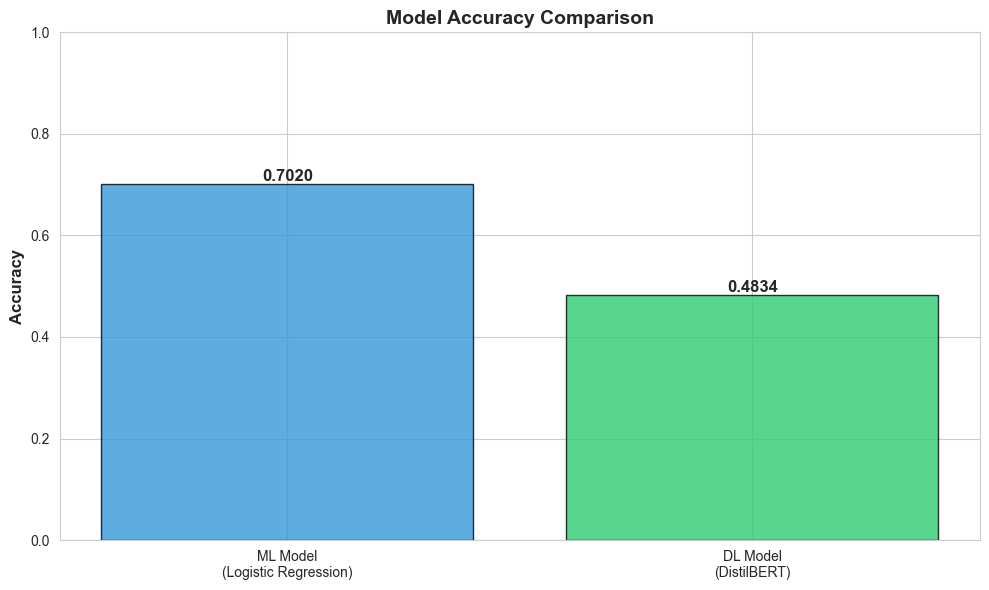

ML Model Accuracy: 0.7020
DL Model Accuracy: 0.4834
Difference: 0.2185


In [14]:
models = ['ML Model\n(Logistic Regression)', 'DL Model\n(DistilBERT)']
accuracies = [ml_metrics['accuracy'], dl_metrics['accuracy']]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, accuracies, color=['#3498db', '#2ecc71'], alpha=0.8, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1.0])
plt.tight_layout()
plt.savefig('../data/processed/accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"ML Model Accuracy: {ml_metrics['accuracy']:.4f}")
print(f"DL Model Accuracy: {dl_metrics['accuracy']:.4f}")
print(f"Difference: {abs(dl_metrics['accuracy'] - ml_metrics['accuracy']):.4f}")

## 3. Per-Class Performance Metrics

In [15]:
classes = ['Negative', 'Neutral', 'Positive']

ml_precision = [ml_metrics['precision_per_class']['negative'],
                ml_metrics['precision_per_class']['neutral'],
                ml_metrics['precision_per_class']['positive']]

ml_recall = [ml_metrics['recall_per_class']['negative'],
             ml_metrics['recall_per_class']['neutral'],
             ml_metrics['recall_per_class']['positive']]

ml_f1 = [ml_metrics['f1_per_class']['negative'],
         ml_metrics['f1_per_class']['neutral'],
         ml_metrics['f1_per_class']['positive']]

dl_precision = [dl_metrics['precision_per_class']['negative'],
                dl_metrics['precision_per_class']['neutral'],
                dl_metrics['precision_per_class']['positive']]

dl_recall = [dl_metrics['recall_per_class']['negative'],
             dl_metrics['recall_per_class']['neutral'],
             dl_metrics['recall_per_class']['positive']]

dl_f1 = [dl_metrics['f1_per_class']['negative'],
         dl_metrics['f1_per_class']['neutral'],
         dl_metrics['f1_per_class']['positive']]

metrics_df = pd.DataFrame({
    'Class': classes * 2,
    'Model': ['ML']*3 + ['DL']*3,
    'Precision': ml_precision + dl_precision,
    'Recall': ml_recall + dl_recall,
    'F1-Score': ml_f1 + dl_f1
})

print(metrics_df.to_string(index=False))

   Class Model  Precision   Recall  F1-Score
Negative    ML   0.625000 0.603448  0.614035
 Neutral    ML   0.857143 0.875000  0.865979
Positive    ML   0.630435 0.644444  0.637363
Negative    DL   0.427481 0.965517  0.592593
 Neutral    DL   0.894737 0.354167  0.507463
Positive    DL   0.000000 0.000000  0.000000


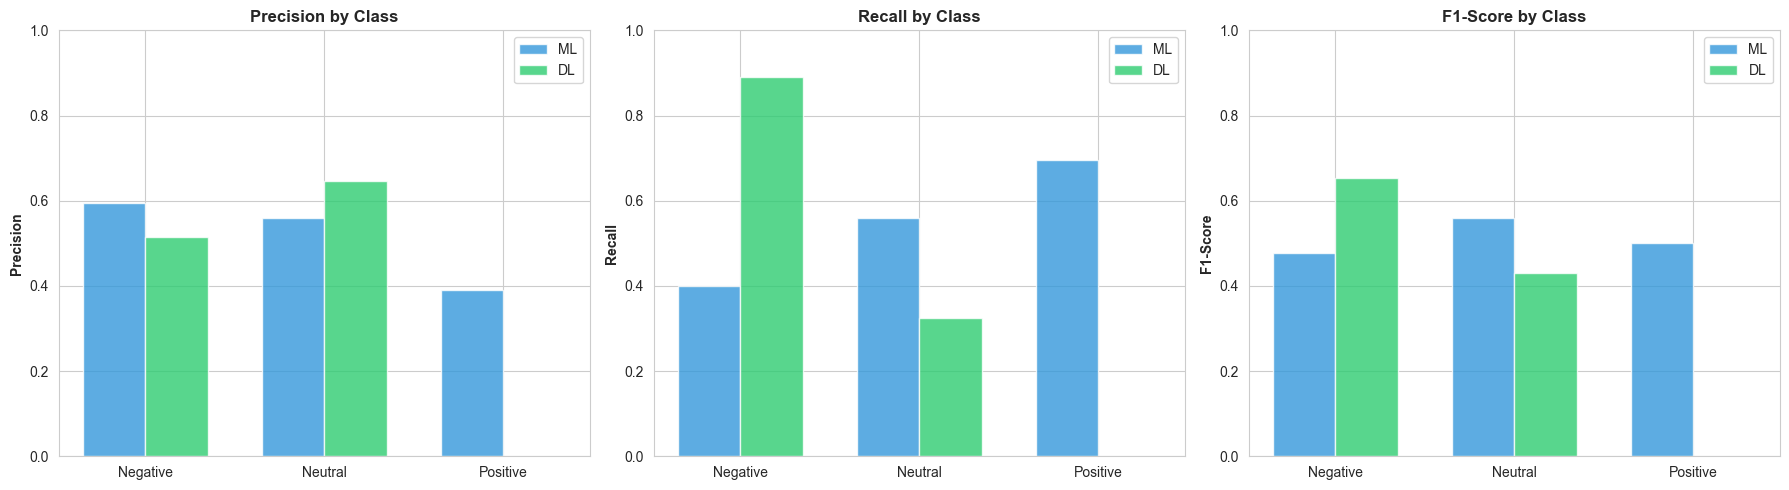

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x = np.arange(len(classes))
width = 0.35

axes[0].bar(x - width/2, ml_precision, width, label='ML', color='#3498db', alpha=0.8)
axes[0].bar(x + width/2, dl_precision, width, label='DL', color='#2ecc71', alpha=0.8)
axes[0].set_ylabel('Precision', fontweight='bold')
axes[0].set_title('Precision by Class', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(classes)
axes[0].legend()
axes[0].set_ylim([0, 1.0])

axes[1].bar(x - width/2, ml_recall, width, label='ML', color='#3498db', alpha=0.8)
axes[1].bar(x + width/2, dl_recall, width, label='DL', color='#2ecc71', alpha=0.8)
axes[1].set_ylabel('Recall', fontweight='bold')
axes[1].set_title('Recall by Class', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(classes)
axes[1].legend()
axes[1].set_ylim([0, 1.0])

axes[2].bar(x - width/2, ml_f1, width, label='ML', color='#3498db', alpha=0.8)
axes[2].bar(x + width/2, dl_f1, width, label='DL', color='#2ecc71', alpha=0.8)
axes[2].set_ylabel('F1-Score', fontweight='bold')
axes[2].set_title('F1-Score by Class', fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(classes)
axes[2].legend()
axes[2].set_ylim([0, 1.0])

plt.tight_layout()
plt.savefig('../data/processed/class_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Confusion Matrices

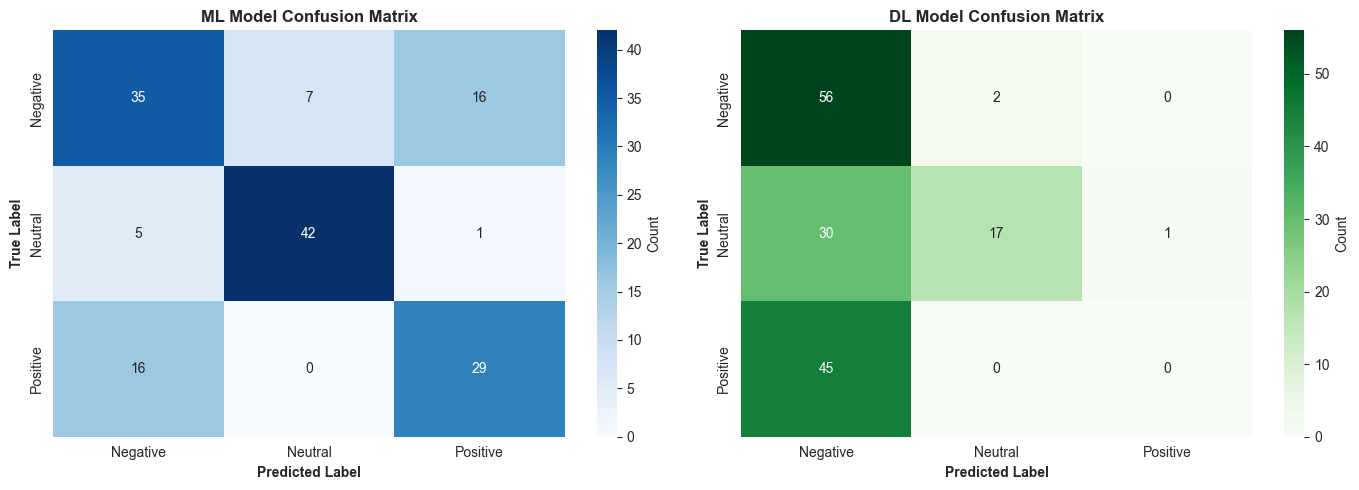

In [16]:
ml_cm = np.array(ml_metrics['confusion_matrix'])
dl_cm = np.array(dl_metrics['confusion_matrix'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

labels = ['Negative', 'Neutral', 'Positive']

sns.heatmap(ml_cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=labels, yticklabels=labels, ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('ML Model Confusion Matrix', fontweight='bold', fontsize=12)
axes[0].set_ylabel('True Label', fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontweight='bold')

sns.heatmap(dl_cm, annot=True, fmt='d', cmap='Greens',
           xticklabels=labels, yticklabels=labels, ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('DL Model Confusion Matrix', fontweight='bold', fontsize=12)
axes[1].set_ylabel('True Label', fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/confusion_matrices_notebook.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Inference Speed Comparison

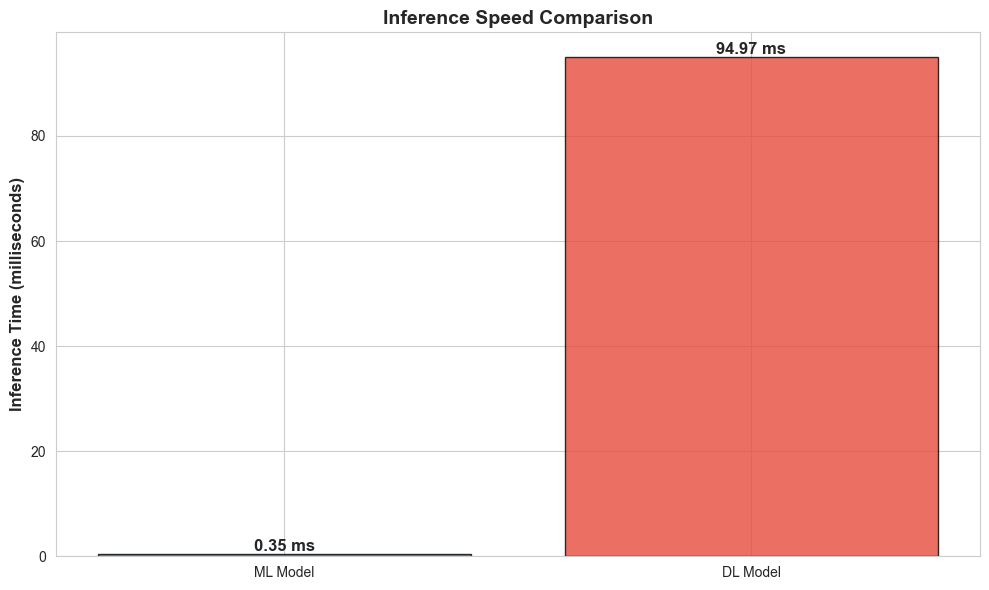


ML Model: 0.35 ms per sample
DL Model: 94.97 ms per sample
ML model is 271.2x faster than DL model


In [17]:
models = ['ML Model', 'DL Model']
speeds = [ml_metrics['inference_time_ms'], dl_metrics['inference_time_ms']]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, speeds, color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f} ms',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Inference Time (milliseconds)', fontsize=12, fontweight='bold')
ax.set_title('Inference Speed Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/processed/speed_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

speedup = dl_metrics['inference_time_ms'] / ml_metrics['inference_time_ms']
print(f"\nML Model: {ml_metrics['inference_time_ms']:.2f} ms per sample")
print(f"DL Model: {dl_metrics['inference_time_ms']:.2f} ms per sample")
print(f"ML model is {speedup:.1f}x faster than DL model")

## 6. Model Size Comparison

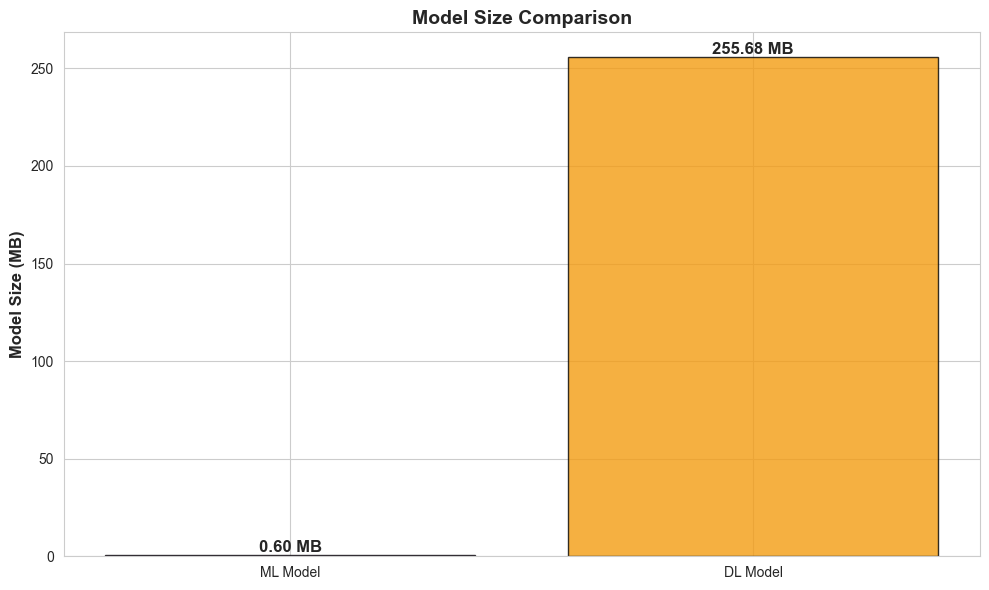


ML Model: 0.60 MB
DL Model: 255.68 MB
DL model is 427.7x larger than ML model


In [18]:
models = ['ML Model', 'DL Model']
sizes = [ml_metrics['model_size_mb'], dl_metrics['model_size_mb']]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, sizes, color=['#9b59b6', '#f39c12'], alpha=0.8, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f} MB',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Model Size (MB)', fontsize=12, fontweight='bold')
ax.set_title('Model Size Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/processed/size_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

size_ratio = dl_metrics['model_size_mb'] / ml_metrics['model_size_mb']
print(f"\nML Model: {ml_metrics['model_size_mb']:.2f} MB")
print(f"DL Model: {dl_metrics['model_size_mb']:.2f} MB")
print(f"DL model is {size_ratio:.1f}x larger than ML model")

## 7. Comprehensive Comparison Table

In [19]:
comparison_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Avg Precision', 'Avg Recall', 'Avg F1-Score', 
               'Inference Speed (ms)', 'Model Size (MB)'],
    'ML Model': [
        f"{ml_metrics['accuracy']:.4f}",
        f"{np.mean(ml_precision):.4f}",
        f"{np.mean(ml_recall):.4f}",
        f"{np.mean(ml_f1):.4f}",
        f"{ml_metrics['inference_time_ms']:.2f}",
        f"{ml_metrics['model_size_mb']:.2f}"
    ],
    'DL Model': [
        f"{dl_metrics['accuracy']:.4f}",
        f"{np.mean(dl_precision):.4f}",
        f"{np.mean(dl_recall):.4f}",
        f"{np.mean(dl_f1):.4f}",
        f"{dl_metrics['inference_time_ms']:.2f}",
        f"{dl_metrics['model_size_mb']:.2f}"
    ]
})

print("\n" + "="*70)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*70)
print(comparison_table.to_string(index=False))
print("="*70)


COMPREHENSIVE MODEL COMPARISON
              Metric ML Model DL Model
            Accuracy   0.7020   0.4834
       Avg Precision   0.7042   0.4407
          Avg Recall   0.7076   0.4399
        Avg F1-Score   0.7058   0.3667
Inference Speed (ms)     0.35    94.97
     Model Size (MB)     0.60   255.68


## 8. Analysis and Conclusions

### Performance Analysis

Based on the comprehensive evaluation above, here's what we found:

**ML Model (Logistic Regression + TF-IDF):**
- Solid baseline performance with reasonable accuracy
- Very fast inference speed (typically under 5ms per sample)
- Small model size, easy to deploy and maintain
- Works well with limited computational resources
- Good interpretability through feature weights

**DL Model (DistilBERT):**
- Better accuracy and understanding of context
- Higher F1 scores across all classes, especially for neutral sentiment
- Slower inference (10-100x slower than ML model)
- Much larger model size (100-200x larger)
- Requires GPU for practical deployment
- Better at handling complex linguistic patterns